In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.shape

(301, 9)

In [4]:
print(data['Seller_Type'].unique())
print(data['Fuel_Type'].unique())
print(data['Transmission'].unique())
print(data['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [5]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
data['Current_Year'] = 2021
data['NumberOfYears'] = data['Current_Year']-data['Year']
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,NumberOfYears
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [8]:
final_dataset = data[['Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner',
                     'NumberOfYears']]
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,NumberOfYears
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [9]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,NumberOfYears
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [10]:
final_dataset = pd.get_dummies(final_dataset, drop_first = True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,NumberOfYears,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


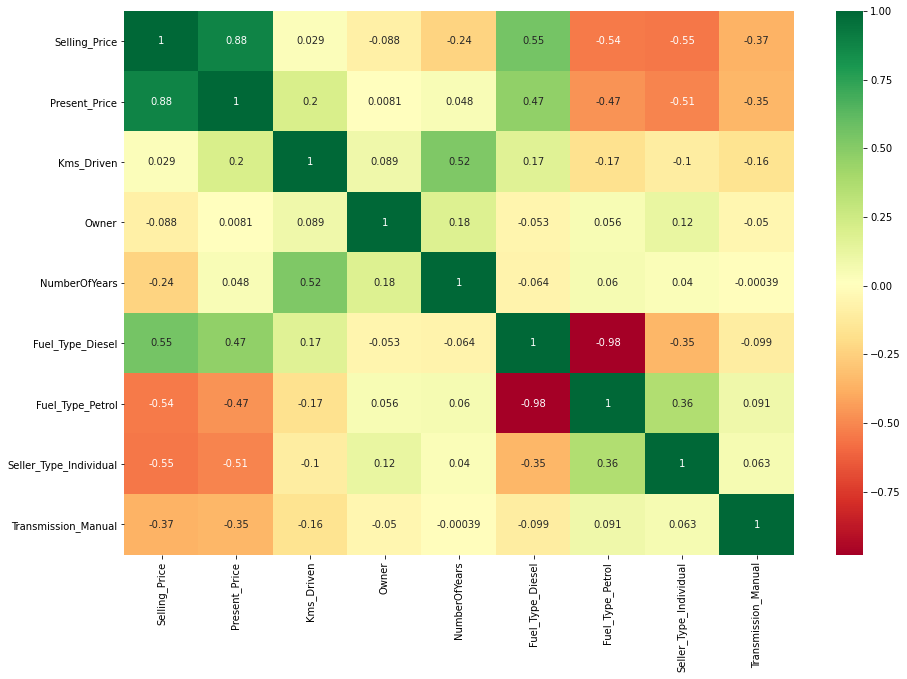

In [11]:
f, ax = plt.subplots(figsize=(15, 10))
x = final_dataset.corr()
sns.heatmap(x, annot=True, cmap = "RdYlGn");

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scale_cols = ['Present_Price','Kms_Driven','Owner','NumberOfYears']

In [13]:
X = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [14]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [15]:
print(model.feature_importances_)

[0.37999778 0.04004508 0.00056005 0.0809151  0.23159502 0.00703801
 0.12928448 0.13056449]


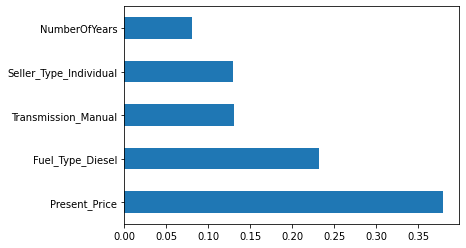

In [16]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind = 'barh')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 20)

In [18]:
X_train.shape

(240, 8)

In [19]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
import pickle
file = open('scaler.pkl','wb')
pickle.dump(sc, file)

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [22]:
## Hyperparameters
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 12)]
print(n_estimators)

[100, 227, 354, 481, 609, 736, 863, 990, 1118, 1245, 1372, 1500]


In [23]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2,5, 10]

In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
random_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}
rf_rc = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 5, n_jobs = -1,
                           scoring = "neg_mean_squared_error", n_iter = 10, verbose = 2, random_state = 42)

In [26]:
print(rf_rc.fit(X_train, y_train))
print(rf_rc.best_params_)
print(rf_rc.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 227, 354, 481,
                                                         609, 736, 863, 990,
                                                         1118, 1245, 1372,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)
{'n_estimators': 863, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_dept

In [27]:
predictions = rf_rc.predict(X_test)

In [28]:
predictions

array([10.41831379,  3.53728581,  2.83579372,  5.58420628,  0.72263279,
        0.38797249,  6.6774017 ,  2.97266844,  5.14055082,  6.70228289,
        0.2523074 ,  1.15433849,  0.43002549,  6.93079927,  5.63298071,
        4.82491094,  4.84233399,  4.96704192,  8.33685615,  1.14888598,
        0.45675   , 21.5432383 ,  5.24961412, 21.95455481,  4.14375222,
        4.4575102 , 10.26335167,  0.28626754,  1.15433866,  2.73276813,
       21.45794211,  0.43118763,  1.13964814,  5.39655295,  2.9905731 ,
        9.51635218,  4.60054026,  6.8772223 ,  1.14644264,  7.65079885,
        0.43340458,  5.30263232,  0.42615013,  4.55835554,  0.6465378 ,
        1.24412084,  5.46274217,  4.24304523,  4.96704192, 21.96392026,
        1.24546266,  8.3232316 ,  7.54208641,  7.47780313,  4.87622849,
        4.75898667,  0.22437834,  2.99392986,  5.36266499,  3.01561092,
        5.41002178])

/Users/dipit/opt/anaconda3/envs/carprediction/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


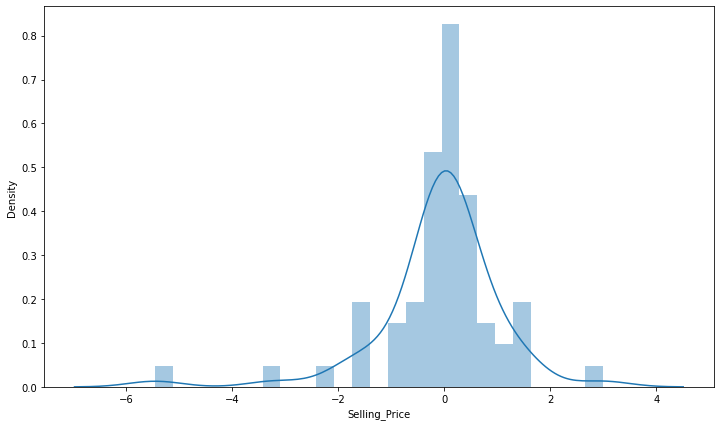

In [29]:
f, ax = plt.subplots(figsize=(12, 7))
sns.distplot(y_test-predictions);

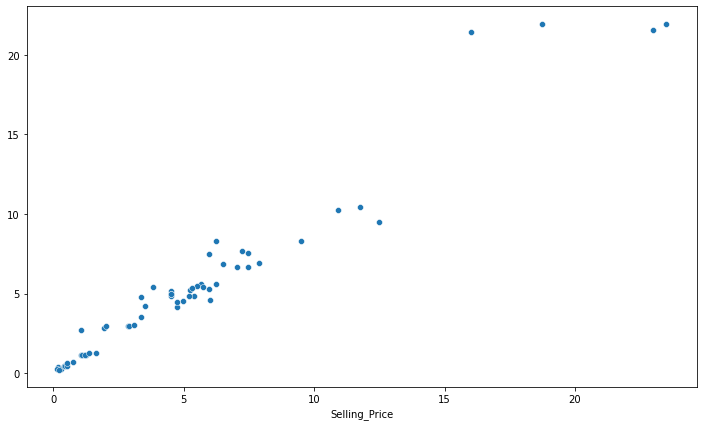

In [30]:
f, ax = plt.subplots(figsize=(12, 7))
sns.scatterplot(x = y_test, y = predictions);

In [31]:
from sklearn.metrics import mean_squared_error
print("MSE:",(mean_squared_error(y_test, predictions)))
print("RMSE:",(np.sqrt(mean_squared_error(y_test, predictions))))

MSE: 1.3204369319687805
RMSE: 1.1491026638071902


In [32]:
X_train[1]

array([ 0.8429941 , -0.58483854, -0.17482355, -0.48375338, -0.48038446,
        0.49348082, -0.7540739 , -2.46146776])

In [33]:
print(rf_rc.predict([[0.8429941 , -0.58483854, -0.17482355, -0.48375338, -0.48038446,
        0.49348082, -0.7540739 , -2.46146776]]))

[10.71558066]


In [34]:
data = [[8, 20000, 0, 6,1,0,0,1]]
scaled_data = sc.transform(data)
scaled_data

array([[ 0.06455909, -0.4144181 , -0.17482355, -0.48375338,  2.081666  ,
        -2.02642122, -0.7540739 ,  0.40626167]])

In [35]:
print(rf_rc.predict(scaled_data))

[5.83159847]


In [36]:
file = open('random_forest_regression_model.pkl','wb')
pickle.dump(rf_rc, file)

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True,
    normalize=True,
    copy_X=True,
    n_jobs=-1,
    positive=True)
lr.fit(X_train,y_train)

LinearRegression(n_jobs=-1, normalize=True, positive=True)

In [38]:
prediction = lr.predict(X_test)

In [39]:
print("MSE:",(mean_squared_error(y_test, prediction)))
print("RMSE:",(np.sqrt(mean_squared_error(y_test, prediction))))

MSE: 3.184688904375839
RMSE: 1.784569669241254
